<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/radial_funnel_chart/Radial_Funnel_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRÁFICO DE FUNIL RADIAL**

Radial Funnel Chart

Com base na referência https://support.sisense.com/kb/en/article/radial-funnel-chart são criadas duas funções para gerar o gráfico de funil radial, uma em que a área o círculo é proporcional aos valores e a outra em que o gráfico é não ponderado, ideal quando tempos valores das áreas muito próximos ou muito diferentes. Além disso são apresentados vários exemplos.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

## Função auxiliar

In [2]:
# textos no gráfico

def kpi_text(ax, text = '', text_color = 'black', x_position = 0, y_position = 0.5, font_size = 13):
    return ax.text(x = x_position,
                   y = y_position,
                   s = text,
                   color = text_color,
                   family = 'sans-serif',
                   fontsize = font_size,
                   horizontalalignment = 'center',
                   verticalalignment = 'center')

## Função radial_funnel

In [3]:
# create the plot
def radial_funnel(labels, values, circle_color, font_color, fontsize_text = 30):
  """
  radial funnel chart
  input: 
    labels: name of groups
    values: values of each group
    circle_color: the color of smaller circle
    font_color: font color of the biggest circle
    fontsize_text: the size of the text in the chart
  """

  # set up the figure
  fig, ax = plt.subplots(figsize = (8,8))
  
  ax.axis('off')
  
  def data_mapper(data = [None]):
    # normalization
    max_data = max(data)
    mapped_area = [d/max_data  for d in data]
    # radius of circles = A = pi R^2
    mapped_radius = [np.sqrt(d/np.pi) for d in mapped_area]
    return mapped_radius

  # mapping the data
  mapped_df = data_mapper(values)

  # colors 
  # generate a gradient of colors, if you want a customized colors, replace colors by your list
  count_steps = len(labels)
  colors = plt.get_cmap(sns.light_palette(circle_color, reverse=False, as_cmap=True))(np.linspace(0, 1, count_steps))

  # the circles
  for i in range(len(mapped_df)):
      ax.add_patch(
        mpatches.Circle( (0.0, mapped_df[i] ),
                        mapped_df[i],
                        color = colors[i]))
      

  # lables an values

  # text_color - the 2 smallest are white
  for i in range(count_steps):
    if i < count_steps-2:
      text_color = font_color
    else:
      text_color = 'white'


    # labels
    kpi_text(ax,
               text = labels[i],
               text_color = text_color,
               font_size = fontsize_text/1.7,
               x_position = 0.0,
               y_position =  2*mapped_df[i]-0.23*mapped_df[0]) # the reference is the top of circle, we subtract a fraction of the radio of biggest circle
    
    # values
    kpi_text(ax,
               text = values[i],
               text_color = text_color,
               font_size = fontsize_text,
               x_position = 0.0 ,
               y_position = 2*mapped_df[i]-0.11*mapped_df[0]) # the reference is the top of circle, we subtract a fraction of the radio of biggest circle
    
    # axis limits
    max_radius = np.sqrt(1/np.pi) # it is the radios of biggest circle
    plt.xlim([-max_radius,max_radius]) 
    plt.ylim([0,2*max_radius])


  return plt

## Função radial_funnel_unweighted

In [4]:
# create the plot
def radial_funnel_unweighted(labels, values, circle_color, font_color, fontsize_text = 30):
  """
  radial funnel chart
  input: 
    labels: name of groups
    values: values of each group
    circle_color: the color of smaller circle
    font_color: font color of the biggest circle
    fontsize_text: the size of the text in the chart
  """

  # set up the figure
  fig, ax = plt.subplots(figsize = (8,8))
  
  ax.axis('off')
  
    # colors 
  count_steps = len(labels)
  colors = plt.get_cmap(sns.light_palette(circle_color, reverse=False, as_cmap=True))(np.linspace(0, 1, count_steps))

  # circles radius
  step = np.sqrt(1/np.pi)/count_steps
  mapped_df = [step*i for i in range(count_steps, 0, -1)]
  
  # the circles
  for i in range(len(mapped_df)):
      ax.add_patch(
        mpatches.Circle( (0.0, mapped_df[i] ),
                        mapped_df[i],
                        color = colors[i]))
      

  # lables an values

  # text_color - the 2 smallest are white
  for i in range(count_steps):
    if i < count_steps-2:
      text_color = font_color
    else:
      text_color = 'white'


    # labels
    kpi_text(ax,
               text = labels[i],
               text_color = text_color,
               font_size = fontsize_text/1.7,
               x_position = 0.0,
               y_position =  2*mapped_df[i]-0.23*mapped_df[0]) # the reference is the top of circle, we subtract a fraction of the radio of biggest circle
    
    # values
    kpi_text(ax,
               text = values[i],
               text_color = text_color,
               font_size = fontsize_text,
               x_position = 0.0 ,
               y_position = 2*mapped_df[i]-0.11*mapped_df[0]) # the reference is the top of circle, we subtract a fraction of the radio of biggest circle
    
    # axis limits
    max_radius = np.sqrt(1/np.pi)
    plt.xlim([-max_radius,max_radius])
    plt.ylim([0,2*max_radius])


  return plt

## Exemplos

### **Exemplo 1**:  radial_funnel

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

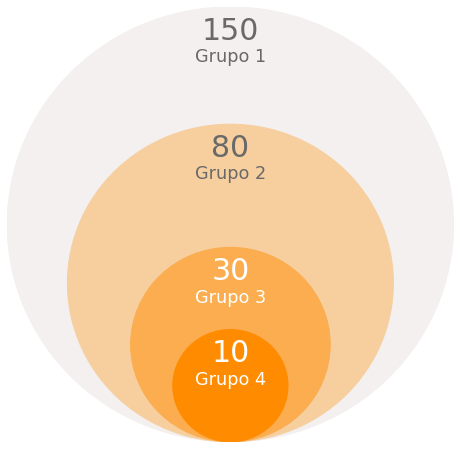

In [5]:
step_freq = [150, 80, 30, 10]
step_name = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
radial_funnel(step_name, step_freq, 'darkorange', 'dimgray', fontsize_text = 30)

### **Exemplo 2**:  radial_funnel - mostrando somente valores

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

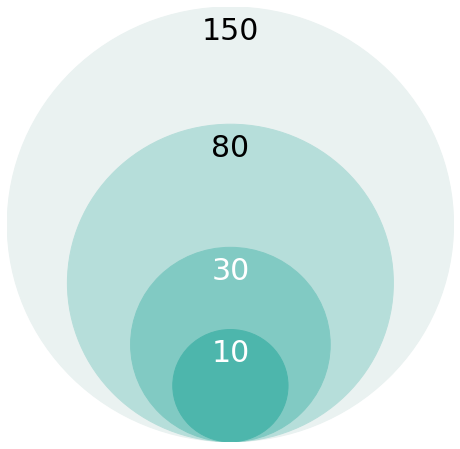

In [6]:
radial_funnel(['','','',''], step_freq, '#4db6ac', 'black', fontsize_text = 30)

### **Exemplo 3**:  radial_funnel - A área do círculo maior é muito maior que a dos outros círculos

- visualmente não fica bom

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

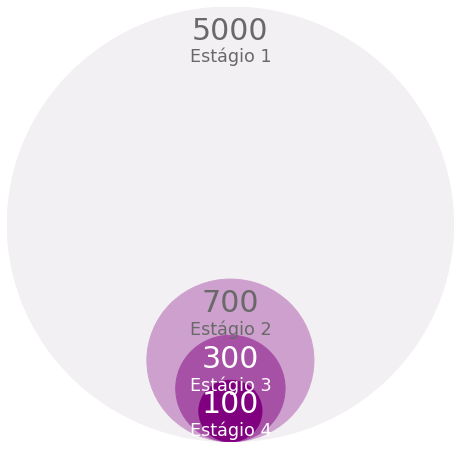

In [7]:
step_freq = [5000, 700, 300, 100]
step_name = ['Estágio 1', 'Estágio 2', 'Estágio 3', 'Estágio 4']
radial_funnel(step_name, step_freq, 'purple', 'dimgray', fontsize_text = 30)

### **Exemplo 4**:  radial_funnel - o valor de duas áreas é próximo

- visualmente não fica bom

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

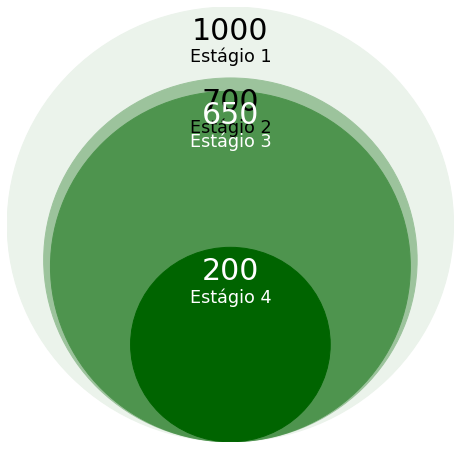

In [8]:
step_freq = [1000, 700, 650, 200]
step_name = ['Estágio 1', 'Estágio 2', 'Estágio 3', 'Estágio 4']
radial_funnel(step_name, step_freq, 'darkgreen', 'black', fontsize_text = 30)

### **Exemplo 5**:  radial_funnel_unweighted

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

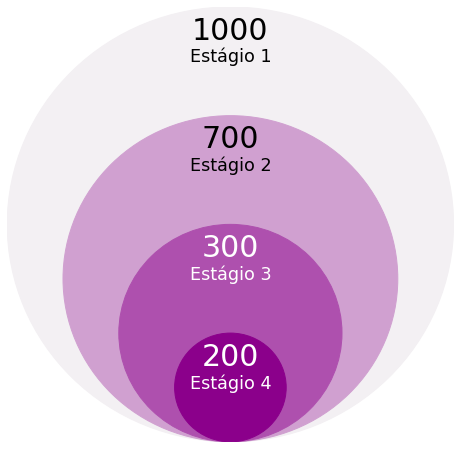

In [9]:
step_freq = [1000, 700, 300, 200]
step_name = ['Estágio 1', 'Estágio 2', 'Estágio 3', 'Estágio 4']
radial_funnel_unweighted(step_name, step_freq, 'darkmagenta', 'black', fontsize_text = 30)

### **Exemplo 6**:  radial_funnel_unweighted - mostrando somente valores

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

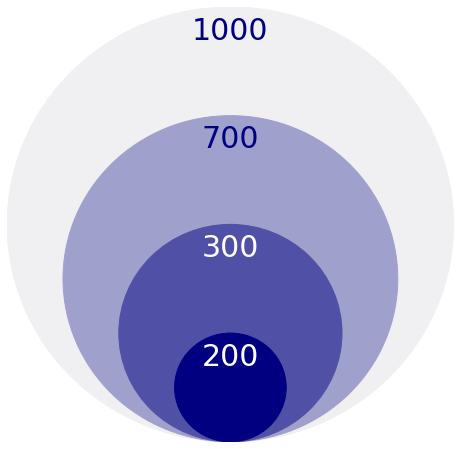

In [10]:
step_freq = [1000, 700, 300, 200]
step_name = ['', '', '', '']
radial_funnel_unweighted(step_name, step_freq, 'navy', 'navy', fontsize_text = 30)

### **Exemplo 7**:  radial_funnel_unweighted - os nomes de cada grupo

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

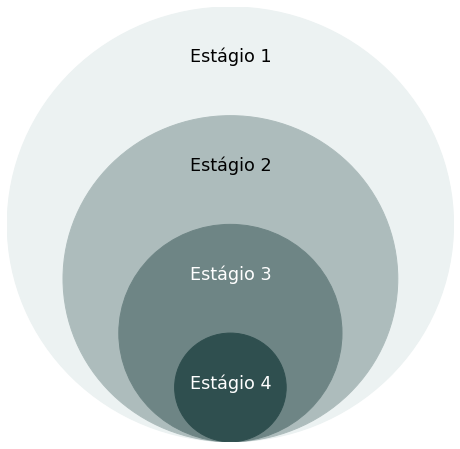

In [11]:
step_freq = ['', '', '', '']
step_name = ['Estágio 1', 'Estágio 2', 'Estágio 3', 'Estágio 4']
radial_funnel_unweighted(step_name, step_freq, 'darkslategray', 'black', fontsize_text = 30)

### **Exemplo 8**:  radial_funnel_unweighted - os nomes de cada grupo

- parecedo com o anterior mas com o nome do grupo mais próximo ao topo do círculo

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

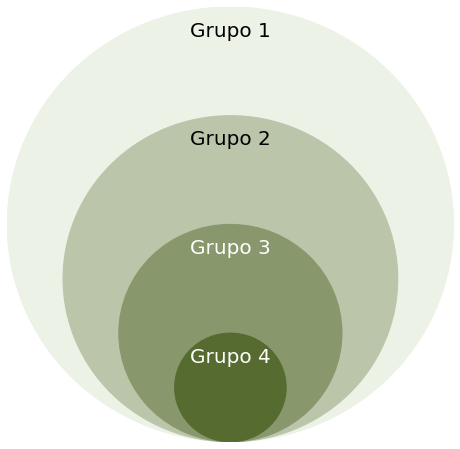

In [12]:
step_freq = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
step_name = ['', '', '', '']
radial_funnel_unweighted(step_name, step_freq, 'darkolivegreen', 'black', fontsize_text = 20)

### **Exemplo 9**:  radial_funnel_unweighted - utilizando os campos step_freq e step_name para agregar mais informações sobre cada grupo

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

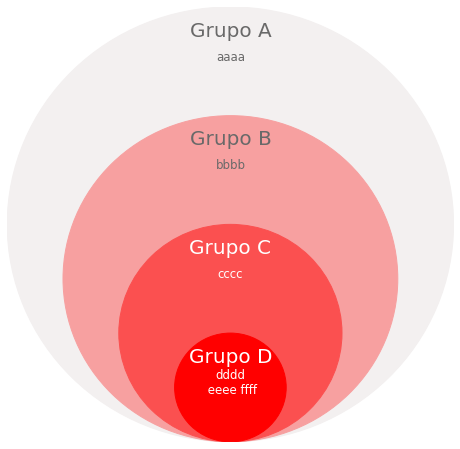

In [13]:
step_freq = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D']
step_name = ['aaaa', 'bbbb', 'cccc', 'dddd\n eeee ffff']
radial_funnel_unweighted(step_name, step_freq, 'red', 'dimgray', fontsize_text = 20)